<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setting" data-toc-modified-id="Setting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setting</a></span><ul class="toc-item"><li><span><a href="#Path" data-toc-modified-id="Path-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Path</a></span></li></ul></li><li><span><a href="#コーナー検出" data-toc-modified-id="コーナー検出-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>コーナー検出</a></span></li></ul></div>

# chpater01_feature_detection(python)

In [4]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

## Setting

In [5]:
import sys
print(sys.version)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [6]:
!pip3 freeze | grep opencv

You are using pip version 8.1.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
opencv-python==3.4.1.15


### Path

In [7]:
path_check_list = []
HOME = Path(os.getcwd()).parent
path_check_list.append(HOME)
image_data_Path = HOME.parent / "image"
path_check_list.append(image_data_Path)

#----------------------------------------
# Check Path existence
for _Path in path_check_list:
    _dire = str(_Path)
    print(os.path.exists(_dire))
    if not os.path.exists(_dire):
        os.makedirs(_dire)
    print(_dire)

True
/home/pollen/workdir/git/github/learning_conputer_visioin/learning_computer_vision_machine_learning_with_opencv/ch01_feature_detection
True
/home/pollen/workdir/git/github/learning_conputer_visioin/learning_computer_vision_machine_learning_with_opencv/image


In [8]:
!ls -l {image_data_Path}

合計 156
-rw-rw-r-- 1 pollen pollen    57  7月 12 06:47 README.md
-rw-rw-r-- 1 pollen pollen 53803  7月 12 06:45 building01.jpg
-rw-rw-r-- 1 pollen pollen 53807  7月 12 06:45 building02.jpg
-rw-rw-r-- 1 pollen pollen 37315  7月 12 06:46 building03.jpg


## コーナー検出
- <a href="https://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=imread#cv2.imread">cv2.imread</a>
- <a href="https://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.cvtcolor#cv2.cvtColor">cv2.cvtColor</a>

In [9]:
img_src = cv2.imread(filename=str(image_data_Path / "building01.jpg"), flags=1)
img_gray = cv2.cvtColor(src=img_src, code=cv2.COLOR_BGR2GRAY)
img_dst = img_src.copy()

- <a href="https://docs.opencv.org/3.0-beta/modules/imgproc/doc/feature_detection.html?highlight=cv2.goodfeaturestotrack#cv2.goodFeaturesToTrack">cv2.goodFeaturesToTrack</a>

In [10]:
corners = cv2.goodFeaturesToTrack(image=img_gray,
                                  maxCorners=1000,
                                  qualityLevel=0.1,
                                  minDistance=5)
for _corner in corners:
    x,y = _corner.ravel()
    cv2.circle(img=img_dst,
               center=(x,y),
               radius=3,
               color=(0,0,255),
               thickness=2)

In [17]:
# For Python Script

#cv2.imshow(winname="src", mat=img_src)
#cv2.imshow(winname="dst", mat=img_dst)
#cv2.waitKey(0)
#cv2.destroyAllWindos()

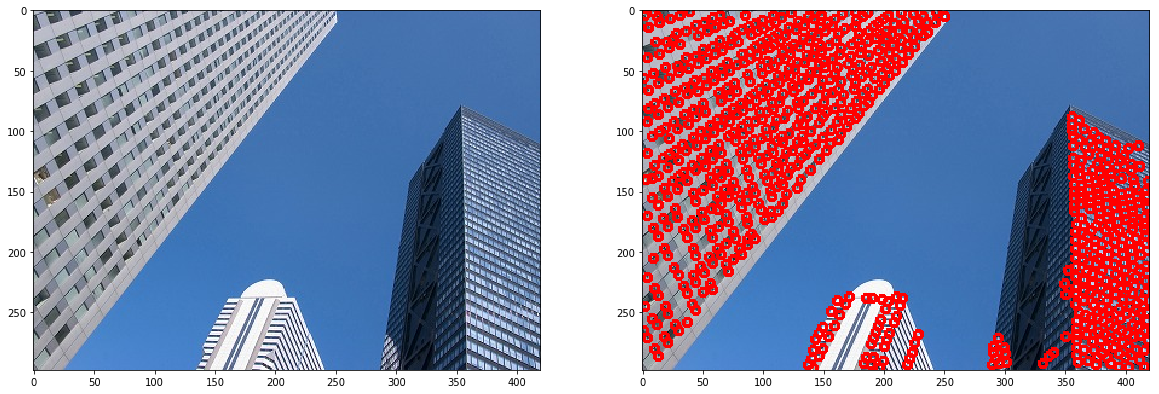

In [18]:
# For Jupyter Notebook

# opencv(bgr) -> matplotlib(rgb)
img_src_plt = cv2.cvtColor(src=img_src,
                           code=cv2.COLOR_BGR2RGB)
img_dst_plt = cv2.cvtColor(src=img_dst,
                           code=cv2.COLOR_BGR2RGB)

# plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img_src_plt)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(img_dst_plt)
plt.show()